# Sentiment analysis data exploration

In [ ]:
import pandas as pd
import seaborn as sns
from clustering_project.visualization import plot_clusters
%load_ext autoreload
%autoreload 2

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sentiment_analysis.data_preprocessing import load_data, process_data
from sentiment_analysis.data_preprocessing import create_tfid_weighted_vec
from sentiment_analysis.train import train_classifier
from sentiment_analysis.word_vectors import train_w2v
from sentiment_analysis.visualization import plot_word_vectors, show_wordcloud, show_topics
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_columns', 999)
sns.set_style('darkgrid')
sns.set_context("talk")
sns.set_palette(sns.color_palette("Paired"))
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\Soriba\Desktop\WPy64-3720\python-3.7.2.amd64\lib\site-packages\past\types\oldstr.py:33: DeprecationWarning: invalid escape sequence \d
  """


In [2]:
n_dim = 40
filename = "train.ft.txt"
data = load_data(filename)
print(f'There are {data.shape[0]} samples')
x_train, x_test, y_train, y_test = process_data(data)

There are 10000 samples


In [3]:
data.head()

,sentiment,text
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [4]:
data['length'] = data['text'].apply(len)
data.groupby('sentiment').mean()

,length
sentiment,
0,450.174416
1,428.841526


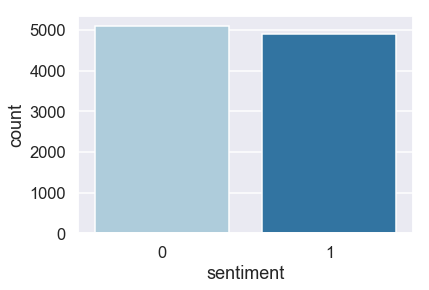

In [5]:
sns.countplot(x='sentiment', data=data)
plt.show()

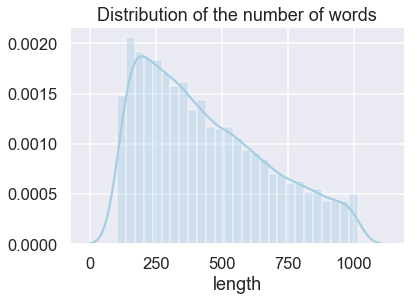

In [6]:
sns.distplot(data['length'])
plt.title('Distribution of the number of words')
plt.show()

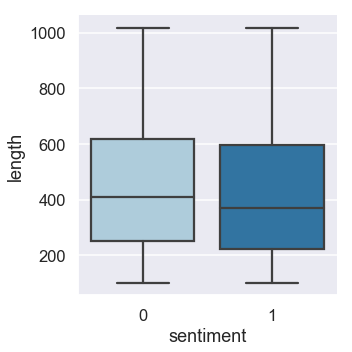

In [7]:
sns.catplot(x="sentiment", y='length', kind='box', data=data) #sns.boxplot ... try
plt.show()

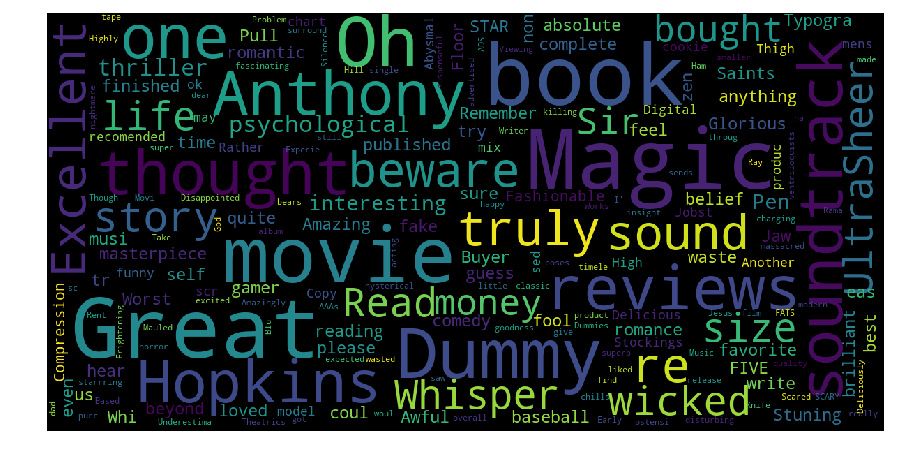

In [8]:
show_wordcloud(data['text'])

In [ ]:
#show_topics(x_train)

In [10]:
print(x_train[0][:20])

['not', 'recommended', ':', 'i', 'have', 'to', 'agree', 'with', 'most', 'of', 'the', 'reviews', 'here', '.', 'this', 'saw', 'is', 'a', 'peice', 'of']


In [11]:
w2v = train_w2v(x_train, n_dim=n_dim)

len words 7500


In [12]:
w2v.wv['good']

array([-0.3936539 ,  0.6535643 ,  1.4817275 , -0.4862166 ,  0.18277888,
       -2.7008715 ,  1.2944894 , -0.45583403,  0.76327324, -0.9219636 ,
        0.20521925, -1.2661933 ,  1.5352248 ,  0.35100073,  0.7617996 ,
        0.04265856,  0.87001544, -2.4690657 , -1.1588824 ,  0.8050121 ,
        0.5878959 ,  3.049087  ,  1.4624385 ,  0.8343145 , -0.23102061,
       -2.3560226 ,  1.5140154 ,  0.5852825 , -0.38859785, -0.6683939 ,
        0.25018555,  0.04190913,  2.5334554 , -0.24831428, -0.6747129 ,
        0.23695734, -0.89166236, -0.86978567,  0.58646584, -0.39869177],
      dtype=float32)

In [13]:
w2v.wv.most_similar('good')

[('nice', 0.8298850059509277),
 ('great', 0.8168355226516724),
 ('bad', 0.7982500195503235),
 ('boring', 0.7973254323005676),
 ('fun', 0.7898595333099365),
 ('sappy', 0.7628235816955566),
 ('entertaining', 0.7489891052246094),
 ('funny', 0.740289032459259),
 ('disappointing', 0.7266370058059692),
 ('cool', 0.7175297141075134)]

In [14]:
n_vectors, dim = w2v.wv.vectors.shape
print(f"there are {n_vectors} vectors of dimension {dim}")

there are 7091 vectors of dimension 40


In [15]:
plot_word_vectors(w2v)

Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7091 samples in 0.025s...
[t-SNE] Computed neighbors for 7091 samples in 7.165s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7091
[t-SNE] Computed conditional probabilities for sample 2000 / 7091
[t-SNE] Computed conditional probabilities for sample 3000 / 7091
[t-SNE] Computed conditional probabilities for sample 4000 / 7091
[t-SNE] Computed conditional probabilities for sample 5000 / 7091
[t-SNE] Computed conditional probabilities for sample 6000 / 7091
[t-SNE] Computed conditional probabilities for sample 7000 / 7091
[t-SNE] Computed conditional probabilities for sample 7091 / 7091
[t-SNE] Mean sigma: 0.089193
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.796684
[t-SNE] KL divergence after 1000 iterations: 2.504475
